1

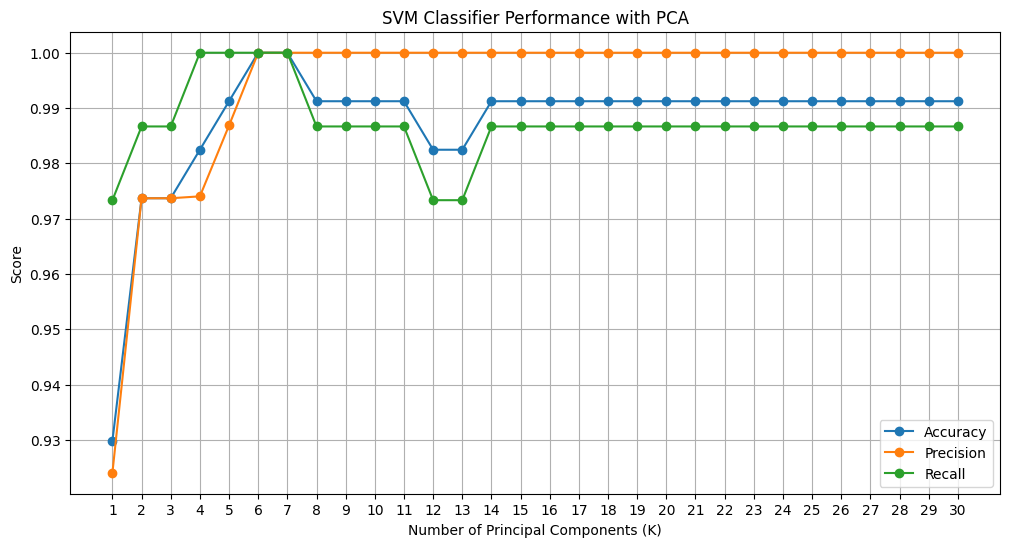

Optimum K: 6.0, Accuracy: 1.0, Precision: 1.0, Recall: 1.0


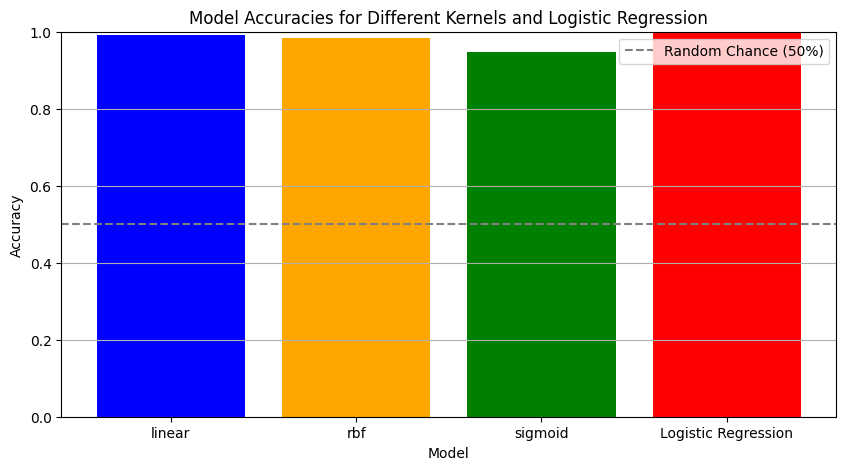

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare to store results
K_values = range(1, X.shape[1] + 1)  # K from 1 to number of features
results = []

# Train SVM with PCA for different values of K
for K in K_values:
    # Perform PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train SVM
    svm = SVC(kernel='linear', random_state=88)
    svm.fit(X_train_pca, y_train)
    
    # Predictions
    y_pred = svm.predict(X_test_pca)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results.append((K, accuracy, precision, recall))

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['K', 'Accuracy', 'Precision', 'Recall'])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='o', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='o', label='Recall')
plt.title('SVM Classifier Performance with PCA')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.xticks(results_df['K'])
plt.legend()
plt.grid()
plt.show()

# Identify the optimum K based on highest accuracy
optimum_k = results_df.loc[results_df['Accuracy'].idxmax()]
print(f'Optimum K: {optimum_k["K"]}, Accuracy: {optimum_k["Accuracy"]}, Precision: {optimum_k["Precision"]}, Recall: {optimum_k["Recall"]}')

# SVM with different kernels
kernels = ['linear', 'rbf', 'sigmoid']
svm_results = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=78)
    svm.fit(X_train_scaled, y_train)
    
    y_pred = svm.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    svm_results.append((kernel, accuracy))

# Logistic Regression
model_with_penalty = LogisticRegression(max_iter=1000, penalty='l2', C=0.8, random_state=82)
model_with_penalty.fit(X_train_scaled, y_train)

y_pred_lr = model_with_penalty.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Prepare data for comparison
kernels_labels = [kernel for kernel, _ in svm_results] + ["Logistic Regression"]
accuracies = [accuracy for _, accuracy in svm_results] + [accuracy_lr]

# Enhanced bar chart for model comparisons
plt.figure(figsize=(10, 5))
plt.bar(kernels_labels, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Model Accuracies for Different Kernels and Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Random Chance (50%)')  # Optional line for context
plt.legend()
plt.show()

2

Optimal number of principal components for Ridge Regression: 10
Lowest MAE for Ridge Regression: 980013.15


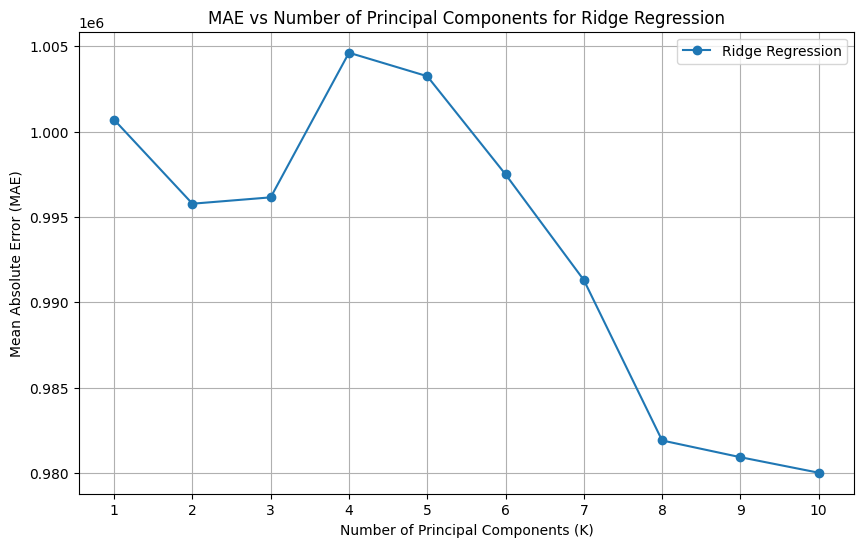

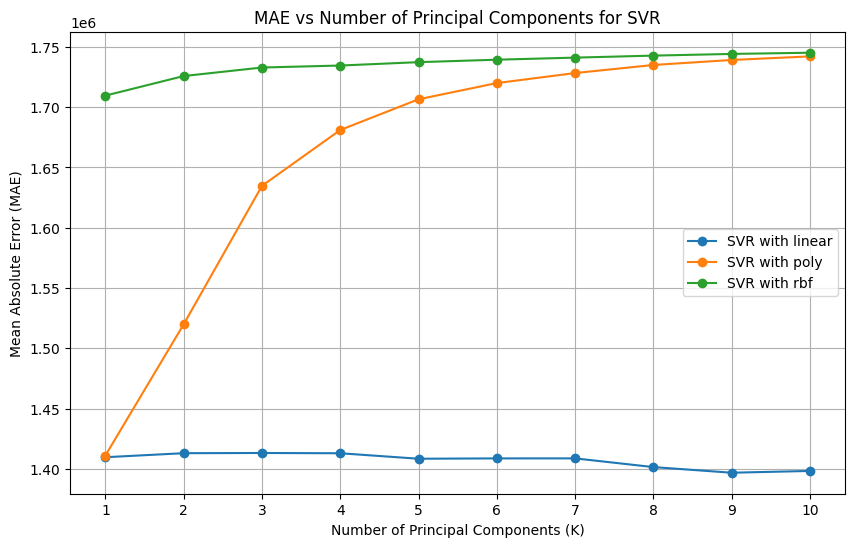

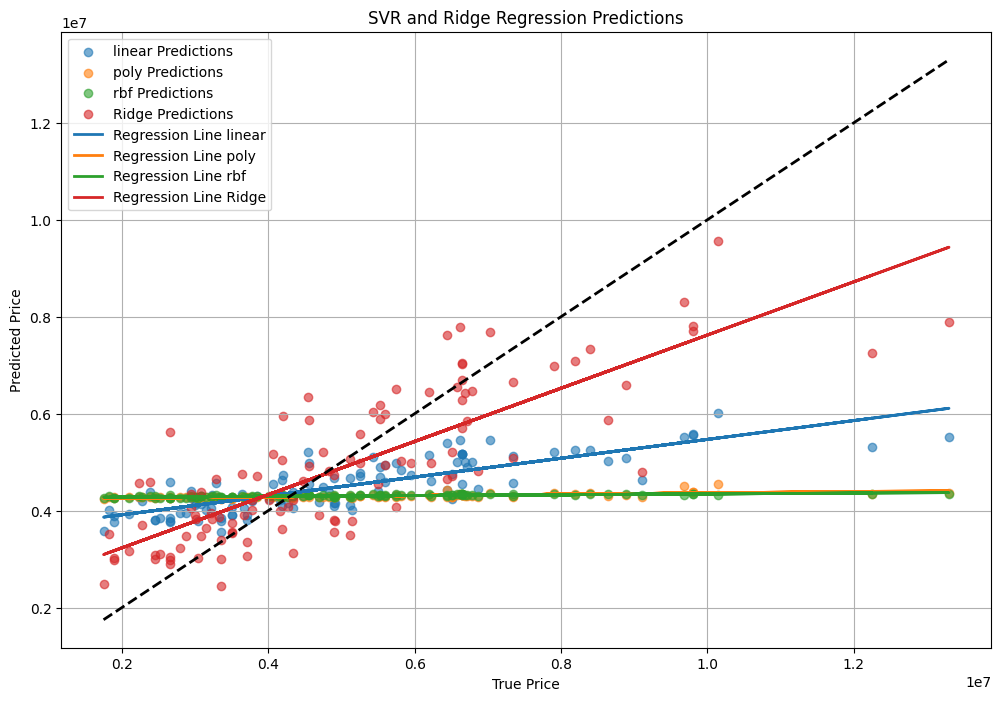

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR

# Load the dataset
data = pd.read_csv('Housing.csv')

# Define input features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
            'parking', 'prefarea']
target = 'price'

# Split the data
X = data[features]
y = data[target]

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 
                                'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

# Train-test split (80% train, 20% eval)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# PCA Feature Extraction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Explore different values of K for PCA
mae_results_ridge = []
mae_results_svr = {'linear': [], 'poly': [], 'rbf': []}
k_values = range(1, min(X_train_pca.shape[1], 20))  # Explore up to 20 components or total components

for k in k_values:
    # Fit Ridge Regression model
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_pca[:, :k], y_train)

    # Transform eval data and make predictions
    X_eval_pca = pca.transform(X_eval_scaled)[:, :k]
    preds_ridge = ridge.predict(X_eval_pca)

    # Calculate mean absolute error for Ridge
    mae_ridge = mean_absolute_error(y_eval, preds_ridge)
    mae_results_ridge.append(mae_ridge)

    # Fit SVR with different kernels
    for kernel in mae_results_svr.keys():
        svr = SVR(kernel=kernel, C=1e3, gamma='scale')
        svr.fit(X_train_pca[:, :k], y_train)
        preds_svr = svr.predict(X_eval_pca)
        mae_svr = mean_absolute_error(y_eval, preds_svr)
        mae_results_svr[kernel].append(mae_svr)

# Find optimal K for Ridge
optimal_k_index_ridge = np.argmin(mae_results_ridge)
optimal_k_value_ridge = k_values[optimal_k_index_ridge]
print(f'Optimal number of principal components for Ridge Regression: {optimal_k_value_ridge}')
print(f'Lowest MAE for Ridge Regression: {mae_results_ridge[optimal_k_index_ridge]:.2f}')

# Plot MAE against number of principal components for Ridge Regression
plt.figure(figsize=(10, 6))
plt.plot(k_values, mae_results_ridge, marker='o', label='Ridge Regression')
plt.title('MAE vs Number of Principal Components for Ridge Regression')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

# Plot MAE for SVR with different kernels
plt.figure(figsize=(10, 6))
for kernel, mae_list in mae_results_svr.items():
    plt.plot(k_values, mae_list, marker='o', label=f'SVR with {kernel}')

plt.title('MAE vs Number of Principal Components for SVR')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

# Fit SVR models with the optimal K
X_train_pca_opt = X_train_pca[:, :optimal_k_value_ridge]
X_eval_pca_opt = X_eval_pca

svr_models = {}
for kernel in mae_results_svr.keys():
    svr = SVR(kernel=kernel, C=1e3, gamma='scale')
    svr_models[kernel] = svr.fit(X_train_pca_opt, y_train)

# Predictions for each SVR model on the eval set
predictions = {}
for kernel, model in svr_models.items():
    predictions[kernel] = model.predict(X_eval_pca_opt)

# Compare with Ridge Regression predictions
predictions['Ridge'] = preds_ridge

# Plotting regression results
plt.figure(figsize=(12, 8))
for kernel, preds in predictions.items():
    plt.scatter(y_eval, preds, label=f'{kernel} Predictions', alpha=0.6)

# Add regression lines
for kernel, preds in predictions.items():
    linear_regressor = LinearRegression()
    linear_regressor.fit(y_eval.values.reshape(-1, 1), preds)
    y_line = linear_regressor.predict(y_eval.values.reshape(-1, 1))
    plt.plot(y_eval, y_line, label=f'Regression Line {kernel}', linewidth=2)

plt.plot([y_eval.min(), y_eval.max()], [y_eval.min(), y_eval.max()], 'k--', lw=2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('SVR and Ridge Regression Predictions')
plt.legend()
plt.grid(True)
plt.show()
